Average time per sample: 0.004 seconds


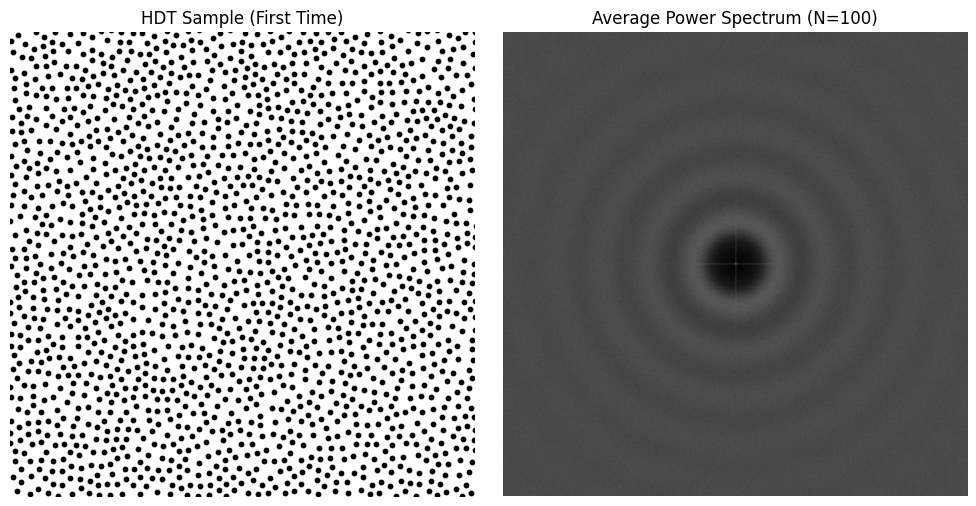

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from hdt_sampling import HDTSampler 
import time

# ---- Parameters ----
width, height = 1000.0, 1000.0
min_dist_abs = 20.0
grid_size_fft = 512
num_samples = 100  # Number of samples for averaging

# ---- Initialize variables ----
avg_power_spectrum = np.zeros((grid_size_fft, grid_size_fft), dtype=np.float64)
first_points = None  # To store the first sample for visualization

# ---- Sampling & Spectrum Calculation ----
total_time = 0.0  # Track total time for averaging
for i in range(num_samples):
    t0 = time.time()
    points = np.asarray(HDTSampler(width, height, min_dist_abs, None).generate())  # Sample points
    t1 = time.time()
    total_time += (t1 - t0)  # Add time to the total

    # Map points to grid
    grid = np.zeros((grid_size_fft, grid_size_fft), dtype=np.float32)
    if points.size:
        x = np.clip((points[:, 0] / width * (grid_size_fft - 1)).astype(int), 0, grid_size_fft - 1)
        y = np.clip((points[:, 1] / height * (grid_size_fft - 1)).astype(int), 0, grid_size_fft - 1)
        grid[y, x] = 1.0

    # FFT and accumulate power spectrum
    fft_shift = np.fft.fftshift(np.fft.fft2(grid))
    avg_power_spectrum += np.abs(fft_shift) ** 2

    # Save the first sample points for visualization
    if first_points is None:
        first_points = points

# ---- Normalize and Log ----
avg_power_spectrum /= num_samples
avg_power_spectrum = np.log1p(avg_power_spectrum)

# ---- Average Time ----
average_time = total_time / num_samples
print(f"Average time per sample: {average_time:.3f} seconds")

# ---- Plotting ----
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# (1) Example scatter plot
axs[0].scatter(first_points[:, 0], first_points[:, 1], s=10, color='black')
axs[0].set_xlim(0, width); axs[0].set_ylim(0, height)
axs[0].set_aspect('equal', adjustable='box'); axs[0].axis('off')
axs[0].set_title('HDT Sample (First Time)')

# (2) Average power spectrum
axs[1].imshow(avg_power_spectrum, cmap='gray', interpolation='antialiased')
axs[1].set_aspect('equal', adjustable='box'); axs[1].axis('off')
axs[1].set_title(f'Average Power Spectrum (N={num_samples})')

plt.tight_layout()
plt.show()
